## Import Libraries

In [1]:
import requests  
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

In [2]:
# Get api keys from key file
from api_keys import client_id, client_secret

## Create zip code DF

In [3]:
zipCSVPath = '../../data/Zip_Code_Data.csv'
zipDF = pd.read_csv(zipCSVPath)
zipDF['Zip'] = zipDF['Zip'].astype(str)
zipDF.head()

,Zip,LAT,LNG,Num_Disp,City,Total_Pop,Percent_Under_18_Years,Percent_Ages_18_to_24,Percent_18_and_Older,Percent_21_and_Older,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
0,90021,34.030124,-118.241779,44.0,Los Angeles,2945,11.3,5.7,88.7,86.8,...,38.4,35.2,1734,171,9.9,9.0,91.0,21635,Quintile 1,25.4
1,90058,34.001842,-118.221127,9.0,Los Angeles,2718,41.1,10.4,58.9,53.1,...,58.1,25.3,706,336,47.6,12.0,88.0,21964,Quintile 1,40.9
2,90013,34.046022,-118.246250,2.0,Los Angeles,12559,3.2,5.5,96.8,96.1,...,36.5,40.6,7308,256,3.5,7.8,92.2,22316,Quintile 1,20.2
3,90007,34.028334,-118.285077,4.0,Los Angeles,42433,14.2,38.3,85.8,69.4,...,48.4,25.1,11919,2213,18.6,12.3,87.7,27406,Quintile 1,41.6
4,90037,34.003494,-118.287097,1.0,Los Angeles,67640,27.8,11.0,72.2,67.8,...,49.8,32.2,17699,6455,36.5,24.1,75.9,35424,Quintile 1,51.4


### Create dataframe for LA zip/census data only

In [4]:
laDF = zipDF[(zipDF.City=="Los Angeles")]

print(laDF.shape)
laDF.head()
#laDF.dtypes

(123, 25)


,Zip,LAT,LNG,Num_Disp,City,Total_Pop,Percent_Under_18_Years,Percent_Ages_18_to_24,Percent_18_and_Older,Percent_21_and_Older,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
0,90021,34.030124,-118.241779,44.0,Los Angeles,2945,11.3,5.7,88.7,86.8,...,38.4,35.2,1734,171,9.9,9.0,91.0,21635,Quintile 1,25.4
1,90058,34.001842,-118.221127,9.0,Los Angeles,2718,41.1,10.4,58.9,53.1,...,58.1,25.3,706,336,47.6,12.0,88.0,21964,Quintile 1,40.9
2,90013,34.046022,-118.246250,2.0,Los Angeles,12559,3.2,5.5,96.8,96.1,...,36.5,40.6,7308,256,3.5,7.8,92.2,22316,Quintile 1,20.2
3,90007,34.028334,-118.285077,4.0,Los Angeles,42433,14.2,38.3,85.8,69.4,...,48.4,25.1,11919,2213,18.6,12.3,87.7,27406,Quintile 1,41.6
4,90037,34.003494,-118.287097,1.0,Los Angeles,67640,27.8,11.0,72.2,67.8,...,49.8,32.2,17699,6455,36.5,24.1,75.9,35424,Quintile 1,51.4


In [5]:
# borrowed this check from the madrid study.  I like this...
laDF.isnull().sum()

Zip                                 0
LAT                                 0
LNG                                 0
Num_Disp                            0
City                                0
Total_Pop                           0
Percent_Under_18_Years              0
Percent_Ages_18_to_24               0
Percent_18_and_Older                0
Percent_21_and_Older                0
Percent_60_and_Older                0
Number_Males                        0
Percent_Male                        0
Male_Median_Age                     0
Number_Females                      0
Pct_Female                          0
Females_Median_Age                  0
Total_Households                    0
Households_with_Children            0
Pct_Households_with_Children        0
Pct_Owner_Occupied                  0
Pct_Renter_Occupied                 0
Household_Median_Income             0
Household_Median_Inc_Quintiles      0
Pct_Earned_Income_Past_12_Months    0
dtype: int64

### Create dataframe for Sacramento zip/census data only

In [6]:
sacDF = zipDF[zipDF.City=="Sacramento"]

sacDF.head()

,Zip,LAT,LNG,Num_Disp,City,Total_Pop,Percent_Under_18_Years,Percent_Ages_18_to_24,Percent_18_and_Older,Percent_21_and_Older,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
123,95815,38.60,-121.46,NaN,Sacramento,25673,27.0,10.2,73.0,69.2,...,48.5,33,9226,2749,29.8,33.7,66.3,34583,Quintile 1,31.4
124,95824,38.52,-121.44,NaN,Sacramento,30296,28.6,11.1,71.4,67.1,...,50.2,34.2,9103,3627,39.8,39.5,60.5,38985,Quintile 1,40.0
125,95832,38.43,-121.51,NaN,Sacramento,12114,29.6,12.1,70.4,65.5,...,49.3,31,3147,1257,39.9,49.3,50.7,47341,Quintile 1,38.4
126,95823,38.47,-121.44,NaN,Sacramento,79440,29.4,9.2,70.6,67.3,...,51.4,32,23710,9088,38.3,45.7,54.3,47553,Quintile 1,38.9
127,95838,38.64,-121.44,NaN,Sacramento,39053,29.3,10.8,70.7,66.5,...,49.7,32.9,11056,4087,37.0,50.3,49.7,48416,Quintile 2,38.1


In [7]:
# borrowed this check from the madrid study.  I like this...
laDF.isnull().sum()

Zip                                 0
LAT                                 0
LNG                                 0
Num_Disp                            0
City                                0
Total_Pop                           0
Percent_Under_18_Years              0
Percent_Ages_18_to_24               0
Percent_18_and_Older                0
Percent_21_and_Older                0
Percent_60_and_Older                0
Number_Males                        0
Percent_Male                        0
Male_Median_Age                     0
Number_Females                      0
Pct_Female                          0
Females_Median_Age                  0
Total_Households                    0
Households_with_Children            0
Pct_Households_with_Children        0
Pct_Owner_Occupied                  0
Pct_Renter_Occupied                 0
Household_Median_Income             0
Household_Median_Inc_Quintiles      0
Pct_Earned_Income_Past_12_Months    0
dtype: int64

## Define method to get venues by the lat and long

In [8]:
clientID = client_id # Foursquare ID
clientSecret = client_secret # Foursquare Secret
version = '20210830' # Foursquare API version
limit = 100 # A default Foursquare API limit value

In [9]:
# Function to find venues in a given neighbourhood
def getVenues(zipCode, latitudes, longitudes, radius=1000):
    
    cols = ['Zip','Zip Latitude','Zip Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
    venuesList=[]
            
    for zipC, lat, lng in zip(zipCode, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            clientID
            ,clientSecret
            ,version
            ,lat
            ,lng
            ,radius
            ,limit)

        # make the GET request
        results = requests.get(url).json()["response"]["venues"]
 #       print(results)
        
        # return only relevant information for each nearby venue
        venuesList.append([(
            zipC,
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results if v['categories']])

    nearbyVenues = pd.DataFrame([item for venuesList in venuesList for item in venuesList])
    nearbyVenues.columns = cols
    
    return(nearbyVenues)

In [10]:
# #### UNCOMMENT THE FOLLOWING FOR A NEW RUN
# # Search for venues within 1Km of radius from the lat and lng
# radius = 100

# laVenuesDF = getVenues(laDF['Zip'],laDF['LAT'],laDF['LNG'],radius)

# laVenuesDF.head()

In [11]:
# # Write out la venue df to csv
laVenueCSV = '../../data/la_venues.csv'
# laVenuesDF.to_csv(laVenueCSV)  #write out venues

In [12]:
# Load la venues dataframe from saved file
laVenuesDF = pd.read_csv(laVenueCSV)
print(laVenuesDF.shape)

laVenuesDF.head(1000)

(10237, 8)


,Unnamed: 0,Zip,Zip Latitude,Zip Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,90021,34.030124,-118.241779,Joker Party Supply,34.030060,-118.242230,Miscellaneous Shop
1,1,90021,34.030124,-118.241779,Los Angeles Wholesale Produce Market,34.031842,-118.242101,Farmers Market
2,2,90021,34.030124,-118.241779,Davalan Sales,34.030091,-118.241833,Food
3,3,90021,34.030124,-118.241779,american celebrations party supplies,34.029739,-118.241905,Arts & Crafts Store
4,4,90021,34.030124,-118.241779,Avina's Tacos,34.030337,-118.242077,Taco Place
...,...,...,...,...,...,...,...,...
995,995,90003,33.963350,-118.273936,CCC Leadership & Business Training Center (L.B...,33.957903,-118.278627,Non-Profit
996,996,90003,33.963350,-118.273936,$1 Tacos,33.968070,-118.278228,Food Truck
997,997,90003,33.963350,-118.273936,Western Truck Exchange,33.960480,-118.271866,Automotive Shop
998,998,90003,33.963350,-118.273936,El Tacorian,33.964539,-118.278740,Taco Place


In [13]:
# Pivot the Venue Category column for each lat and long
pivotedLaDF = pd.get_dummies(laVenuesDF[['Venue Category']],prefix="",prefix_sep="")

pivotedLaDF.head(1000)

,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,...,Wedding Hall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# add zip to pivoted dataframe
pivotedLaDF['Zip'] = laVenuesDF['Zip'].astype(str)

# move zip to the first column of the pivoted dataframe
orderedCols = [pivotedLaDF.columns[-1]] + list(pivotedLaDF.columns[:-1])
pivotedLaDF = pivotedLaDF[orderedCols]

In [15]:
print(pivotedLaDF.shape)
pivotedLaDF.head(1000) # sanity check

(10237, 502)


,Zip,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,...,Wedding Hall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
laGrouped = pivotedLaDF.groupby('Zip').mean().reset_index()

print(laGrouped.shape)
laGrouped.head(1000)

(123, 502)


,Zip,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,...,Wedding Hall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,90001,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.011494,0.0,0.034483,0.0,0.0,0.0,0.000000,0.000000,0.0
1,90002,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.010870,0.0,0.0,0.0,0.010870,0.000000,0.0
2,90003,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.021053,0.0,0.0,0.0,0.000000,0.000000,0.0
3,90004,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.010989,0.000000,0.0
4,90005,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,91602,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.011628,0.0
119,91604,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
120,91605,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.011628,0.0,0.0,0.0,0.000000,0.011628,0.0
121,91606,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


## Find the most common venues for each LA zip

In [17]:
# Function for sorting the venues in descending order
def getMostCommonVenues(row, numTopVenues):
    rowCategories = row.iloc[1:]
    rowCategoriesSrt = rowCategories.sort_values(ascending=False)
    
    return rowCategoriesSrt.index.values[0:numTopVenues]

In [18]:
# Creates the dataframe with the top n common venues
numTopVenues = 25

indicators = ['st', 'nd', 'rd'] #suffix for the numeric position

# create columns according to number of top venues
columns = ['Zip']
for ind in np.arange(numTopVenues):
    try:
        columns.append('{}{}'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th'.format(ind+1))

# create a new dataframe
laVenuesSrt = pd.DataFrame(columns=columns)
laVenuesSrt['Zip'] = laGrouped['Zip']

for ind in np.arange(laGrouped.shape[0]):
    laVenuesSrt.iloc[ind, 1:] = getMostCommonVenues(laGrouped.iloc[ind, :], numTopVenues)

print(laVenuesSrt.shape)
laVenuesSrt.head()

(123, 26)


,Zip,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,...,16th,17th,18th,19th,20th,21th,22th,23th,24th,25th
0,90001,Automotive Shop,Salon / Barbershop,Doctor's Office,Mobile Phone Shop,Hardware Store,Church,Miscellaneous Shop,Bank,Wine Bar,...,Locksmith,Grocery Store,Bakery,Discount Store,Fruit & Vegetable Store,Furniture / Home Store,Chinese Restaurant,Car Wash,Sandwich Place,Theme Park
1,90002,Bank,Building,Miscellaneous Shop,Church,Mobile Phone Shop,High School,Taco Place,School,Salon / Barbershop,...,Pizza Place,Hospital,Pharmacy,Restaurant,Burger Joint,Coworking Space,Library,Food Truck,Market,Convenience Store
2,90003,Church,Automotive Shop,Salon / Barbershop,Miscellaneous Shop,Gas Station,Building,Mobile Phone Shop,Taco Place,Mexican Restaurant,...,Nail Salon,Wine Bar,Storage Facility,Bank,Brewery,Food,Rental Service,Marijuana Dispensary,Food Truck,Restaurant
3,90004,Korean Restaurant,Automotive Shop,Latin American Restaurant,Dentist's Office,Mexican Restaurant,Laundromat,Bakery,Sushi Restaurant,Bus Station,...,Asian Restaurant,Bus Line,Financial or Legal Service,Building,Spa,Pizza Place,Medical Center,Marijuana Dispensary,Liquor Store,Lounge
4,90005,Residential Building (Apartment / Condo),Spiritual Center,Wine Bar,Eye Doctor,Gym,Zoo Exhibit,Elementary School,Electronics Store,Eastern European Restaurant,...,Doner Restaurant,Donburi Restaurant,Embassy / Consulate,Ethiopian Restaurant,Entertainment Service,Escape Room,Doctor's Office,Event Service,Event Space,Fabric Shop


## ML TIME

Text(0.5, 1.0, 'Elbow Method For Clusters')

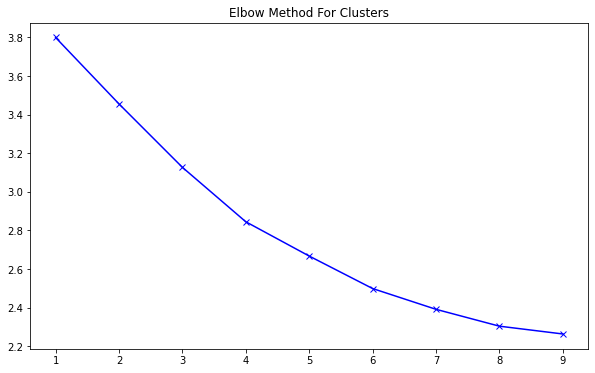

In [19]:
# Find number of clusters using the elbow method
laClustering = laGrouped.drop('Zip', 1)
ssd = []
K = range(1,10)

for k in K:
    kmeans = KMeans(
                n_clusters=k, 
                random_state=100,
                n_init=10,
                max_iter=300)
    
    kmeans.fit(laClustering)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.title('Elbow Method For Clusters')

In [20]:
# Number of clusters
ks = 6

# Run Kmeans
kmeans = KMeans(n_clusters=ks).fit(laClustering)

In [21]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 2, 0, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 4, 2, 2, 3, 2, 2, 3,
       2, 2, 2, 1, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       3, 2, 3, 1, 2, 0, 2, 0, 2, 2, 3, 1, 3, 3, 1, 2, 3, 2, 4, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 3, 3, 2, 2, 0, 2, 0, 2, 2, 4, 2, 0, 2, 3, 2, 0,
       2, 0, 4, 0, 3, 3, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 4, 2, 2, 3, 1, 2, 0, 0, 2], dtype=int32)

In [22]:
# view cluster centers
kmeans.cluster_centers_

array([[ 2.43337411e-03, -2.16840434e-19, -4.33680869e-19, ...,
         4.72589792e-04,  1.86425683e-03, -5.42101086e-20],
       [ 2.16840434e-19,  0.00000000e+00, -4.33680869e-19, ...,
         1.30718954e-03,  1.29198966e-03,  0.00000000e+00],
       [ 2.54058490e-03,  8.54108607e-04,  2.42523931e-03, ...,
         4.83766211e-03,  1.15464479e-03,  1.67112299e-04],
       [ 8.67361738e-19,  1.34563629e-03, -6.50521303e-19, ...,
         7.08717222e-04,  6.34012933e-03, -2.71050543e-20],
       [ 0.00000000e+00,  2.24719101e-03,  7.00909577e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [23]:
# add cluster labels
laVenuesSrt.insert(1, 'Cluster Labels', kmeans.labels_)

laVenuesSrt.head()

,Zip,Cluster Labels,1st,2nd,3rd,4th,5th,6th,7th,8th,...,16th,17th,18th,19th,20th,21th,22th,23th,24th,25th
0,90001,0,Automotive Shop,Salon / Barbershop,Doctor's Office,Mobile Phone Shop,Hardware Store,Church,Miscellaneous Shop,Bank,...,Locksmith,Grocery Store,Bakery,Discount Store,Fruit & Vegetable Store,Furniture / Home Store,Chinese Restaurant,Car Wash,Sandwich Place,Theme Park
1,90002,2,Bank,Building,Miscellaneous Shop,Church,Mobile Phone Shop,High School,Taco Place,School,...,Pizza Place,Hospital,Pharmacy,Restaurant,Burger Joint,Coworking Space,Library,Food Truck,Market,Convenience Store
2,90003,0,Church,Automotive Shop,Salon / Barbershop,Miscellaneous Shop,Gas Station,Building,Mobile Phone Shop,Taco Place,...,Nail Salon,Wine Bar,Storage Facility,Bank,Brewery,Food,Rental Service,Marijuana Dispensary,Food Truck,Restaurant
3,90004,2,Korean Restaurant,Automotive Shop,Latin American Restaurant,Dentist's Office,Mexican Restaurant,Laundromat,Bakery,Sushi Restaurant,...,Asian Restaurant,Bus Line,Financial or Legal Service,Building,Spa,Pizza Place,Medical Center,Marijuana Dispensary,Liquor Store,Lounge
4,90005,5,Residential Building (Apartment / Condo),Spiritual Center,Wine Bar,Eye Doctor,Gym,Zoo Exhibit,Elementary School,Electronics Store,...,Doner Restaurant,Donburi Restaurant,Embassy / Consulate,Ethiopian Restaurant,Entertainment Service,Escape Room,Doctor's Office,Event Service,Event Space,Fabric Shop


In [24]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 0, laVenuesSrt.columns[[0] + [1] + list(range(4, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,3rd,4th,5th,6th,7th,8th,9th,10th,...,16th,17th,18th,19th,20th,21th,22th,23th,24th,25th
0,90001,0,Doctor's Office,Mobile Phone Shop,Hardware Store,Church,Miscellaneous Shop,Bank,Wine Bar,Donut Shop,...,Locksmith,Grocery Store,Bakery,Discount Store,Fruit & Vegetable Store,Furniture / Home Store,Chinese Restaurant,Car Wash,Sandwich Place,Theme Park
2,90003,0,Salon / Barbershop,Miscellaneous Shop,Gas Station,Building,Mobile Phone Shop,Taco Place,Mexican Restaurant,Office,...,Nail Salon,Wine Bar,Storage Facility,Bank,Brewery,Food,Rental Service,Marijuana Dispensary,Food Truck,Restaurant
14,90016,0,Church,Building,Taco Place,Hardware Store,School,Gas Station,Bus Line,Antique Shop,...,Mexican Restaurant,Lounge,Storage Facility,Flower Shop,Bus Stop,Food Truck,Medical Center,Locksmith,Fast Food Restaurant,Business Service
28,90032,0,Laundry Service,Mexican Restaurant,Grocery Store,Trail,Food Truck,Thrift / Vintage Store,Food,Liquor Store,...,Residential Building (Apartment / Condo),Pizza Place,Food Stand,Convenience Store,Performing Arts Venue,Park,Post Office,Outdoors & Recreation,Dentist's Office,Marijuana Dispensary
34,90038,0,Salon / Barbershop,Lounge,Conference Room,General Entertainment,Rock Club,Laundry Service,Bank,Bar,...,Food Truck,Non-Profit,Sorority House,Southern / Soul Food Restaurant,Grocery Store,Gas Station,Yoga Studio,Hardware Store,Hotel,Arcade
39,90044,0,Automotive Shop,Cosmetics Shop,Building,Burger Joint,Smoke Shop,Nightclub,Mobile Phone Shop,Pizza Place,...,Taco Place,Pharmacy,Rock Club,Chinese Restaurant,Restaurant,Seafood Restaurant,Residential Building (Apartment / Condo),Preschool,Convenience Store,Professional & Other Places
49,90061,0,Gas Station,Laundry Service,Office,Food Truck,Hospital,Miscellaneous Shop,Building,Factory,...,Light Rail Station,Government Building,Skating Rink,Police Station,Car Wash,Café,Bus Station,Chinese Restaurant,Bus Line,School
51,90063,0,Food Truck,Elementary School,Bank,Salon / Barbershop,Food,Taco Place,Library,Grocery Store,...,Bakery,Mobile Phone Shop,Residential Building (Apartment / Condo),Thai Restaurant,Bar,Non-Profit,Laundry Service,ATM,Doctor's Office,Supermarket
76,90501,0,Office,Japanese Restaurant,Salon / Barbershop,Design Studio,Insurance Office,Bank,Church,Business Service,...,Construction & Landscaping,Print Shop,Real Estate Office,College Residence Hall,Clothing Store,Recreation Center,Residential Building (Apartment / Condo),Pet Store,Shoe Store,Shopping Mall
78,90710,0,Food,Chinese Restaurant,Mexican Restaurant,Storage Facility,Medical Center,Doctor's Office,Laundry Service,Convenience Store,...,Fast Food Restaurant,Bakery,Non-Profit,Post Office,Professional & Other Places,Jewelry Store,Residential Building (Apartment / Condo),Fraternity House,Salon / Barbershop,Cosmetics Shop


In [25]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 1, laVenuesSrt.columns[[0] + [1] + list(range(4, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,3rd,4th,5th,6th,7th,8th,9th,10th,...,16th,17th,18th,19th,20th,21th,22th,23th,24th,25th
25,90028,1,General Entertainment,Comedy Club,Coworking Space,Bar,Lounge,Nightclub,Historic Site,Parking,...,Design Studio,Music Venue,Residential Building (Apartment / Condo),Library,Latin American Restaurant,Tech Startup,Scenic Lookout,Theme Restaurant,Street Art,Cocktail Bar
41,90046,1,Building,Bank,Speakeasy,Nail Salon,Dance Studio,Pet Service,General College & University,Print Shop,...,Miscellaneous Shop,Photography Lab,Spa,Movie Theater,Escape Room,Music Venue,General Travel,Shipping Store,Scenic Lookout,Recruiting Agency
47,90058,1,Office,Warehouse,Medical Center,Coworking Space,Seafood Restaurant,Paper / Office Supplies Store,Coffee Shop,Gas Station,...,Tech Startup,Farm,Athletics & Sports,Nightclub,Food,Flower Shop,Boutique,Convenience Store,General Entertainment,Film Studio
55,90067,1,General Entertainment,Bank,Lawyer,Conference Room,Café,Park,Government Building,Mexican Restaurant,...,Hot Dog Joint,Lounge,Shipping Store,Shopping Mall,Rock Club,Coworking Space,Paper / Office Supplies Store,Advertising Agency,Food Service,Embassy / Consulate
58,90071,1,Building,Food Truck,Café,Financial or Legal Service,Sculpture Garden,Salon / Barbershop,Gym,New American Restaurant,...,Roof Deck,Salad Place,Bakery,Coffee Shop,Alternative Healer,Bar,Mexican Restaurant,Fruit & Vegetable Store,Library,Playground
65,90232,1,City Hall,Building,Medical Center,Coffee Shop,Dentist's Office,Scenic Lookout,Café,School,...,Vegetarian / Vegan Restaurant,Sporting Goods Shop,Credit Union,Post Office,Plaza,Coworking Space,Historic Site,Recording Studio,Event Service,Event Space
66,90245,1,Automotive Shop,Tech Startup,Gym,Martial Arts School,Church,Coffee Shop,Salon / Barbershop,Park,...,New American Restaurant,Music Venue,Laundry Service,Bathing Area,Middle School,Café,Business Service,Film Studio,Event Space,Food Truck
68,90248,1,Office,Factory,Tech Startup,Coworking Space,Miscellaneous Shop,Furniture / Home Store,Bakery,Hardware Store,...,Boutique,Storage Facility,Mexican Restaurant,Clothing Store,Sporting Goods Shop,Garden Center,Gas Station,Trade School,Dessert Shop,Auto Dealership
118,91602,1,Gas Station,Automotive Shop,Dentist's Office,General Entertainment,Building,Doctor's Office,Arts & Entertainment,Bank,...,Bus Line,Church,Theater,Monument / Landmark,Gaming Cafe,Fast Food Restaurant,Event Space,Middle Eastern Restaurant,Storage Facility,School


In [26]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 2, laVenuesSrt.columns[[0] + [1] + list(range(4, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,3rd,4th,5th,6th,7th,8th,9th,10th,...,16th,17th,18th,19th,20th,21th,22th,23th,24th,25th
1,90002,2,Miscellaneous Shop,Church,Mobile Phone Shop,High School,Taco Place,School,Salon / Barbershop,Light Rail Station,...,Pizza Place,Hospital,Pharmacy,Restaurant,Burger Joint,Coworking Space,Library,Food Truck,Market,Convenience Store
3,90004,2,Latin American Restaurant,Dentist's Office,Mexican Restaurant,Laundromat,Bakery,Sushi Restaurant,Bus Station,Dive Bar,...,Asian Restaurant,Bus Line,Financial or Legal Service,Building,Spa,Pizza Place,Medical Center,Marijuana Dispensary,Liquor Store,Lounge
5,90006,2,Gas Station,Cosmetics Shop,Spa,Doctor's Office,Café,Bakery,Bus Stop,Building,...,Acupuncturist,Coffee Shop,Other Repair Shop,Chinese Restaurant,Korean BBQ Restaurant,Food,Marijuana Dispensary,Gaming Cafe,Donut Shop,Sandwich Place
7,90008,2,Cosmetics Shop,Kids Store,School,Mexican Restaurant,Shoe Store,Doctor's Office,Food Court,Asian Restaurant,...,Pharmacy,Farmers Market,Office,Shopping Mall,Financial or Legal Service,Pizza Place,Fried Chicken Joint,Electronics Store,Fast Food Restaurant,Boutique
8,90010,2,Japanese Restaurant,Asian Restaurant,Building,Bus Line,Juice Bar,General Entertainment,Nail Salon,Sushi Restaurant,...,Cosmetics Shop,Bar,Mobile Phone Shop,Lounge,Lawyer,Food Truck,Bookstore,Doctor's Office,ATM,Food & Drink Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,91423,2,Residential Building (Apartment / Condo),Salon / Barbershop,Chinese Restaurant,Gym,Building,Bus Line,Comfort Food Restaurant,Farmers Market,...,Miscellaneous Shop,Smoke Shop,Speakeasy,Moving Target,General Entertainment,Car Wash,Office,School,College Classroom,Pilates Studio
115,91504,2,Residential Building (Apartment / Condo),Gas Station,Miscellaneous Shop,Pizza Place,Laundry Service,Salon / Barbershop,Automotive Shop,Pool,...,Library,Spiritual Center,Squash Court,Middle Eastern Restaurant,Bus Stop,Mental Health Office,Factory,Meeting Room,Medical Lab,Liquor Store
116,91505,2,Gift Shop,Cosmetics Shop,Salon / Barbershop,Clothing Store,Nail Salon,Thrift / Vintage Store,Food Truck,Boutique,...,Theater,Bank,Coffee Shop,Church,Furniture / Home Store,Lingerie Store,Plaza,Poke Place,Pizza Place,Coworking Space
119,91604,2,Office,Salon / Barbershop,Arts & Crafts Store,Coffee Shop,Gift Shop,Cycle Studio,Furniture / Home Store,Optical Shop,...,Farmers Market,Sandwich Place,Cheese Shop,Café,Newsstand,Tanning Salon,Tailor Shop,Shoe Store,Miscellaneous Shop,Seafood Restaurant


In [27]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 3, laVenuesSrt.columns[[0] + [1] + list(range(4, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,3rd,4th,5th,6th,7th,8th,9th,10th,...,16th,17th,18th,19th,20th,21th,22th,23th,24th,25th
6,90007,3,Residential Building (Apartment / Condo),Sorority House,Speakeasy,Nightclub,Other Nightlife,Lounge,Laundry Service,Student Center,...,Tea Room,Basketball Court,Gastropub,College Classroom,Bagel Shop,Bank,Housing Development,Doctor's Office,Dessert Shop,Food Truck
18,90020,3,Doctor's Office,Building,Dentist's Office,Church,Lawyer,Nail Salon,Ice Cream Shop,Miscellaneous Shop,...,Bar,Restaurant,Latin American Restaurant,Food,Fried Chicken Joint,Laundry Service,Non-Profit,Tech Startup,Market,College Academic Building
21,90024,3,Gym,Gym / Fitness Center,Rental Car Location,Art Gallery,Food,Breakfast Spot,TV Station,General Travel,...,Music Venue,American Restaurant,Martial Arts School,Fraternity House,Building,Bar,Pool,Office,Scenic Lookout,Hotel Bar
30,90034,3,Shoe Store,Salon / Barbershop,Miscellaneous Shop,Pizza Place,Bank,Office,Coworking Space,BBQ Joint,...,Non-Profit,Locksmith,Tennis Court,Optical Shop,Recycling Facility,Light Rail Station,Sandwich Place,Church,Music Venue,Chinese Restaurant
32,90036,3,Building,Bridal Shop,Speakeasy,Coffee Shop,Miscellaneous Shop,Design Studio,Furniture / Home Store,Coworking Space,...,Fast Food Restaurant,Mental Health Office,Big Box Store,Light Rail Station,Bus Station,Spa,Bus Stop,Butcher,Shopping Mall,Smoke Shop
44,90049,3,Post Office,Bakery,Health Food Store,Spa,Nail Salon,Yoga Studio,Doctor's Office,Restaurant,...,Shipping Store,Meeting Room,Speakeasy,Pilates Studio,Sporting Goods Shop,Flower Shop,Mexican Restaurant,Sushi Restaurant,Synagogue,Café
46,90057,3,Dentist's Office,Government Building,Theater,Building,South American Restaurant,General Entertainment,Performing Arts Venue,Automotive Shop,...,Clothing Store,Laundry Service,Parking,Bakery,Food,Trail,Doctor's Office,Chiropractor,Massage Studio,Chinese Restaurant
54,90066,3,Coworking Space,Elementary School,Office,Automotive Shop,Spiritual Center,School,Dentist's Office,Mexican Restaurant,...,Tech Startup,Nursery School,Bakery,Salon / Barbershop,General Entertainment,Laundry Service,Art Gallery,Veterinarian,Playground,Entertainment Service
56,90068,3,Music Venue,Strip Club,Trail,Pool,Historic Site,Park,Bus Line,Building,...,Bridge,Taco Place,Tanning Salon,Tapas Restaurant,Scenic Lookout,Salon / Barbershop,Reservoir,Tech Startup,Comedy Club,Pilates Studio
57,90069,3,Pharmacy,Salon / Barbershop,Office,Spa,Hotel Pool,Hotel Bar,Grocery Store,Gym / Fitness Center,...,Restaurant,Men's Store,French Restaurant,Moving Target,Other Nightlife,Juice Bar,Sandwich Place,Beach,Bank,Pizza Place


In [28]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 4, laVenuesSrt.columns[[0] + [1] + list(range(4, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,3rd,4th,5th,6th,7th,8th,9th,10th,...,16th,17th,18th,19th,20th,21th,22th,23th,24th,25th
15,90017,4,Office,Building,Medical Center,Residential Building (Apartment / Condo),Tech Startup,Lawyer,Deli / Bodega,Café,...,Coffee Shop,Bank,Restaurant,Thai Restaurant,Pool,Salon / Barbershop,Nightclub,Sushi Restaurant,Boutique,Medical Lab
62,90211,4,Office,Building,Dentist's Office,Cosmetics Shop,Indian Restaurant,Chiropractor,Tanning Salon,Tech Startup,...,Café,Miscellaneous Shop,Bus Line,Accessories Store,Bridal Shop,Men's Store,Acupuncturist,Elementary School,Massage Studio,Advertising Agency
81,90732,4,Medical Center,Hospital,Building,Salon / Barbershop,Coworking Space,Medical Lab,Park,Garden,...,Chinese Restaurant,Church,School,Sandwich Place,Hardware Store,Coffee Shop,Professional & Other Places,Insurance Office,General Entertainment,Dance Studio
90,91307,4,Dentist's Office,Medical Lab,Flower Shop,Professional & Other Places,Office,Gym,Salon / Barbershop,Heliport,...,Nursery School,Dessert Shop,Sandwich Place,Tourist Information Center,Tech Startup,Event Space,Laundry Service,Chinese Restaurant,Dive Bar,Hospital
114,91436,4,Dentist's Office,Medical Center,Financial or Legal Service,Building,Lawyer,Chiropractor,Salon / Barbershop,Hospital,...,Tech Startup,Chinese Restaurant,Massage Studio,Boutique,Middle Eastern Restaurant,Food,Eye Doctor,Pharmacy,Conference Room,Hotel


In [30]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 5, laVenuesSrt.columns[[0] + [1] + list(range(4, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,3rd,4th,5th,6th,7th,8th,9th,10th,...,16th,17th,18th,19th,20th,21th,22th,23th,24th,25th
4,90005,5,Wine Bar,Eye Doctor,Gym,Zoo Exhibit,Elementary School,Electronics Store,Eastern European Restaurant,EV Charging Station,...,Doner Restaurant,Donburi Restaurant,Embassy / Consulate,Ethiopian Restaurant,Entertainment Service,Escape Room,Doctor's Office,Event Service,Event Space,Fabric Shop


In [29]:
laDFMerged = laDF

# merge madrid_grouped with df_madrid to add latitude/longitude for each neighbourhood
laDFMerged = laVenuesSrt.join(laDFMerged.set_index('Zip'), on='Zip')

laDFMerged.head()

,Zip,Cluster Labels,1st,2nd,3rd,4th,5th,6th,7th,8th,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
0,90001,0,Automotive Shop,Salon / Barbershop,Doctor's Office,Mobile Phone Shop,Hardware Store,Church,Miscellaneous Shop,Bank,...,48.3,29.6,13669,6033,44.1,35.9,64.1,43360,Quintile 1,45.7
1,90002,2,Bank,Building,Miscellaneous Shop,Church,Mobile Phone Shop,High School,Taco Place,School,...,52.3,28.6,12917,5650,43.7,35.0,65.0,37285,Quintile 1,45.9
2,90003,0,Church,Automotive Shop,Salon / Barbershop,Miscellaneous Shop,Gas Station,Building,Mobile Phone Shop,Taco Place,...,51.0,29.3,17484,7839,44.8,28.3,71.7,40598,Quintile 1,49.1
3,90004,2,Korean Restaurant,Automotive Shop,Latin American Restaurant,Dentist's Office,Mexican Restaurant,Laundromat,Bakery,Sushi Restaurant,...,50.7,35.5,22004,5392,24.5,16.6,83.4,49675,Quintile 2,36.1
4,90005,5,Residential Building (Apartment / Condo),Spiritual Center,Wine Bar,Eye Doctor,Gym,Zoo Exhibit,Elementary School,Electronics Store,...,49.6,36.7,16781,3235,19.3,7.7,92.3,38491,Quintile 1,30.4
